In [1]:
import torch

pc_data = torch.load("./eval-results/chairs_6k.pth")

In [2]:
pc_data.shape

torch.Size([400, 6144, 3])

In [3]:
test_data = pc_data[1,...]

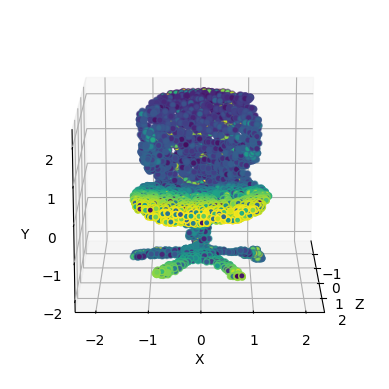

In [4]:
from visuals.visuals_util import visualize_pointcloud
fig = visualize_pointcloud(test_data)

In [5]:
test_data = test_data.detach().cpu().numpy()

In [23]:
import open3d as o3d
# Convert to Open3D PointCloud format
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_data)

# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=512))

# Surface reconstruction using Ball Pivoting
radii = [0.05, 0.15, 0.35, 0.75]
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))

# Visualize the mesh
o3d.io.write_triangle_mesh("output_mesh.ply", mesh)

True

In [6]:
import open3d as o3d
import numpy as np

# Convert to Open3D PointCloud format
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_data)

# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.25, max_nn=128))

# Normalize normals to ensure they are unit vectors, which is a requirement for Poisson reconstruction
pcd.normalize_normals()

# Poisson surface reconstruction
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    poisson_mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=10)

# Optionally: Remove low density vertices
# Convert densities to a numpy array
"""
densities = np.asarray(densities)

# Choose a density threshold
density_threshold = 0.01

# Find the vertex indices that meet the density threshold
vertices_to_remove = densities < density_threshold

# Remove vertices with densities below the threshold
density_mesh = poisson_mesh.select_by_index(
    np.where(vertices_to_remove)[0], invert=True
)
"""
# Visualize the mesh
o3d.visualization.draw_geometries([poisson_mesh])

# Save the mesh
o3d.io.write_triangle_mesh("output_poisson_mesh.ply", poisson_mesh)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D DEBUG] Input Points / Samples: 6144 / 3900
[Open3D DEBUG] #   Got kernel density: 0.031153202056884766 (s), 5165.6484375 (MB) / 5165.6484375 (MB) / 5165 (MB)
[Open3D DEBUG] #     Got normal field: 0.03426003456115723 (s), 5173.1640625 (MB) / 5173.1640625 (MB) / 5173 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 2.232955e-04 / 1.371928e+00
[Open3D DEBUG] #       Finalized tree: 0.11815786361694336 (s), 5186.5703125 (MB) / 5186.5703125 (MB) / 5186 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.4148528575897217 (s), 5186.5703125 (MB) / 5186.5703125 (MB) / 5186 (MB)
[Open3D DEBUG] #Set point constraints: 0.09868693351745605 (s), 5186.5703125 (MB) / 5186.5703125 (MB) / 5186 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 393065 / 163992 / 285225
[Open3D DEBUG] Memory Usage: 5186.570 MB
Cycle[0] Depth

True